# process scRNA data from Compass 

In [30]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import scipy
from utils import *
import joblib

In [28]:
out_file_path = './'
data_dir = out_file_path + 'data/compass_scrna/'
out_dir = out_file_path + 'compass_comparison/scrna/'
gene_signature_dir = out_file_path + 'gene_signatures/'

## read results from limma
positive logFC: up in pathogenic  
negative logFC: up in non-pathogenic

In [24]:
de_genes_all = pd.read_csv(out_dir + 'de_genes_toptable_limma.csv', index_col = 0)
de_genes_all

,logFC,AveExpr,t,P.Value,adj.P.Val,B
AQP3,-6.300183,3.298555,-37.147549,6.206266e-114,5.469582e-110,247.927181
MAF,-5.521903,3.369200,-33.797761,4.946358e-104,2.179613e-100,225.645859
PDPN,-5.852255,3.395294,-29.124095,3.185392e-89,9.357620e-86,192.183156
LGALS1,-1.840688,10.117213,-22.776495,3.051426e-67,6.723055e-64,142.281577
TMEM176B,-6.677593,3.523027,-22.178156,4.545083e-65,8.011164e-62,137.337013
...,...,...,...,...,...,...
HMGXB4,0.000435,2.660498,0.001873,9.985065e-01,9.989115e-01,-7.251174
BET1L,0.000464,3.068423,0.001792,9.985715e-01,9.989115e-01,-7.251174
TYK2,-0.000182,0.651814,-0.001219,9.990283e-01,9.992551e-01,-7.251175
PLA2G4B,-0.000088,0.464821,-0.000826,9.993416e-01,9.994550e-01,-7.251176


In [82]:
p_thresh = 0.05
logfc_thresh = 0.05

In [83]:
de_genes = de_genes_all[de_genes_all['adj.P.Val'] < p_thresh]
de_genes_d = {}
de_genes_d['pvn'] = de_genes[de_genes['logFC'] > logfc_thresh]
de_genes_d['nvp'] = de_genes[de_genes['logFC'] < (-1 * logfc_thresh)]

read in gene signatures

In [84]:
out_filename = gene_signature_dir + 'metabolism_rxn_subsystem.pickle'
subsystem_to_genes = joblib.load(out_filename)
metabolism_sig = {key: [item[0] for item in subsystem_to_genes[key]] for key in subsystem_to_genes}

In [85]:
out_filename = gene_signature_dir + 'metabolism_rxn_reaction.pickle'
reaction_sig_genes = joblib.load(out_filename)
reaction_sig = {k: v[0] for k,v in reaction_sig_genes.items()}

In [86]:
for k,v in metabolism_sig.items():
    print(f'{k}: {len(v)}')

Fatty acid oxidation: 32
Nucleotide interconversion: 102
Keratan sulfate degradation: 11
Sphingolipid metabolism: 29
Tyrosine metabolism: 34
Keratan sulfate synthesis: 15
Steroid metabolism: 25
Chondroitin synthesis: 30
Tryptophan metabolism: 36
Glycerophospholipid metabolism: 61
Inositol phosphate metabolism: 60
Folate metabolism: 11
Valine, leucine, and isoleucine metabolism: 31
Chondroitin sulfate degradation: 10
Cholesterol metabolism: 22
Arginine and Proline Metabolism: 33
Bile acid synthesis: 9
Fatty acid synthesis: 8
Glycine, serine, alanine and threonine metabolism: 23
Pyrimidine catabolism: 23
Blood group synthesis: 5
Pyruvate metabolism: 32
Aminosugar metabolism: 26
Heparan sulfate degradation: 6
Urea cycle: 17
Purine catabolism: 13
Eicosanoid metabolism: 19
Methionine and cysteine metabolism: 20
Lysine metabolism: 25
Starch and sucrose metabolism: 14
Pentose phosphate pathway: 12
NAD metabolism: 14
Vitamin A metabolism: 15
beta-Alanine metabolism: 21
Triacylglycerol synthesi

In [87]:
print(len(metabolism_sig.keys()))

81


In [88]:
for k,v in reaction_sig.items():
    print(f'{k}: {len(v)}')

13DAMPPOX: 3
2HBO: 5
2OXOADOXm: 4
34DHOXPEGOX: 6
34DHPHAMT: 1
34DHPLACOX: 4
34DHPLACOX_NADP_: 3
34DHXMANDACOX: 3
34DHXMANDACOX_NADP_: 2
34HPPOR: 1
3AIBTm: 1
3DSPHR: 1
3HAO: 1
3HBCDm: 1
3HKYNAKGAT: 2
3HLYTCL: 1
3HPCOAHYD: 1
3HXKYNOXDA: 2
3M4HDXPAC: 4
3MOX4HOXPGALDOX: 4
3MOX4HOXPGALDOX_NADP_: 4
3MOXTYROX: 2
3NTD7l: 4
3SALACBOXL: 3
3SALATAi: 1
3SALATAim: 1
41R1H2MAE12BOOX: 2
41R2A1H12BOOX: 2
42A12BOOX: 5
4HGLSDm: 1
4HOXPACDOX_NADP_: 4
4NPHSULT: 1
5ADTSTSTERONESULT: 2
5HLTDL: 1
5HOXINDACTO2OX: 1
5HOXINDACTOXm: 3
5HOXINOXDA: 2
5HTRPDOX: 1
5HXKYNDCL: 1
5HXKYNOXDA: 2
A4GALTc: 1
A4GALTg: 1
AACOAT: 1
AACTOOR: 1
AATAi: 1
ABTArm: 1
ABUTD: 1
ACACT10m: 3
ACACT1x: 1
ACACT4p: 1
ACACT5p: 1
ACACT6p: 1
ACACT7p: 1
ACACT8p: 1
ACACT9p: 1
ACCOACm: 1
ACCOAL: 1
ACCOALm: 2
ACGAM2E: 1
ACGAM6PSi: 1
ACGAMK: 1
ACGAMPM: 1
ACGPID: 1
ACGSm: 1
ACHEe: 1
ACNAM9PL: 1
ACNAM9PL2: 1
ACNAMPH: 3
ACOAD10m: 2
ACOAD1fm: 7
ACOAD8m: 1
ACOAD9m: 2
ACOAO7p: 1
ACOATA: 1
ACODA: 1
ACOX22x: 1
ACOX2x: 1
ACP1_FMN_: 4
ACS: 2
ACS2: 2
ACSm: 1

In [89]:
print(len(reaction_sig.keys()))

1292


In [90]:
# read in scRNA data
compass_data = pd.read_csv(data_dir + 'github_data/linear_gene_expression_matrix.tsv', sep = '\t', index_col = 0) # this is library size normalized already
metadata = pd.read_csv(data_dir + 'github_data/cell_metadata.csv')
#samples = list(set([i[:-9] for i in compass_data.columns]))

In [91]:
n_genes_total = len(compass_data.index)
n_genes_total

8813

In [92]:
de_genes_d['pvn']

,logFC,AveExpr,t,P.Value,adj.P.Val,B
TIGIT,4.967554,3.907939,18.365159,6.267043e-51,3.945103e-48,105.129481
IL22,7.627100,4.137263,17.747014,1.319564e-48,7.752880e-46,99.832944
TNFSF8,3.540967,2.169876,16.699485,1.154186e-44,6.357400e-42,90.845153
PDZK1IP1,5.427555,3.932362,16.585375,3.101253e-44,1.518408e-41,89.866303
EGFR,3.698484,1.864550,14.494723,2.068453e-36,7.291712e-34,72.024131
...,...,...,...,...,...,...
ZFP566,0.660177,1.587015,2.557505,1.103691e-02,4.939986e-02,-4.021428
TMLHE,0.354578,0.523122,2.556736,1.106081e-02,4.945656e-02,-4.023349
DCUN1D4,0.413077,0.552865,2.555095,1.111193e-02,4.963480e-02,-4.027445
MTHFR,0.405404,0.687422,2.554832,1.112014e-02,4.964630e-02,-4.028101


In [93]:
de_genes_d['nvp']

,logFC,AveExpr,t,P.Value,adj.P.Val,B
AQP3,-6.300183,3.298555,-37.147549,6.206266e-114,5.469582e-110,247.927181
MAF,-5.521903,3.369200,-33.797761,4.946358e-104,2.179613e-100,225.645859
PDPN,-5.852255,3.395294,-29.124095,3.185392e-89,9.357620e-86,192.183156
LGALS1,-1.840688,10.117213,-22.776495,3.051426e-67,6.723055e-64,142.281577
TMEM176B,-6.677593,3.523027,-22.178156,4.545083e-65,8.011164e-62,137.337013
...,...,...,...,...,...,...
ARF4,-0.370043,6.941361,-2.557214,1.104595e-02,4.941520e-02,-4.022155
CALM3,-0.242958,5.668878,-2.555869,1.108779e-02,4.955208e-02,-4.025513
WDR76,-0.433569,3.409969,-2.554548,1.112904e-02,4.965368e-02,-4.028812
TPP1,-0.636203,2.505325,-2.552760,1.118507e-02,4.986039e-02,-4.033272


# subsystem scoring

In [62]:
all_genes = list(compass_data.index)
overlapping_terms, n_removed_terms = get_overlapping_met_genes(metabolism_sig, all_genes, verb = True)

Fatty acid oxidation	original: 32 | overlapping: 19 | removed: 13
Nucleotide interconversion	original: 102 | overlapping: 52 | removed: 50
Keratan sulfate degradation	original: 11 | overlapping: 10 | removed: 1
Sphingolipid metabolism	original: 29 | overlapping: 17 | removed: 12
Tyrosine metabolism	original: 34 | overlapping: 14 | removed: 20
Keratan sulfate synthesis	original: 15 | overlapping: 7 | removed: 8
Steroid metabolism	original: 25 | overlapping: 6 | removed: 19
Chondroitin synthesis	original: 30 | overlapping: 14 | removed: 16
Tryptophan metabolism	original: 36 | overlapping: 16 | removed: 20
Glycerophospholipid metabolism	original: 61 | overlapping: 32 | removed: 29
Inositol phosphate metabolism	original: 60 | overlapping: 35 | removed: 25
Folate metabolism	original: 11 | overlapping: 6 | removed: 5
Valine, leucine, and isoleucine metabolism	original: 31 | overlapping: 27 | removed: 4
Chondroitin sulfate degradation	original: 10 | overlapping: 8 | removed: 2
Cholesterol met

(array([ 2.,  1.,  4.,  5., 10., 18.,  8.,  9.,  6., 18.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

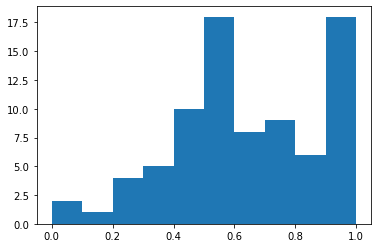

In [63]:
prop_removed = {}
for k,v in n_removed_terms.items():
    prop_removed[k] = (len(metabolism_sig[k]) - v)/len(metabolism_sig[k])
plt.hist(prop_removed.values())

(0.0, 100.0)

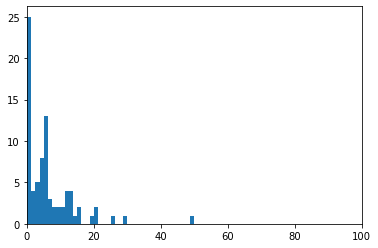

In [64]:
plt.hist(n_removed_terms.values(), bins = 40)
plt.xlim(0,100)

In [65]:
min_prop = 0.7
min_length = 1

overlapping_terms_filter = {}
for k,v in overlapping_terms.items():
    if (len(v) >= min_length) & (prop_removed[k] > min_prop):
        overlapping_terms_filter[k] = v


In [118]:
pd.Series(overlapping_terms_filter.keys()).to_csv(out_dir + 'subsystem_term_names.csv')

(array([30., 29., 10.,  7.,  1.,  1.,  1.,  0.,  0.,  2.]),
 array([ 0. ,  5.6, 11.2, 16.8, 22.4, 28. , 33.6, 39.2, 44.8, 50.4, 56. ]),
 <BarContainer object of 10 artists>)

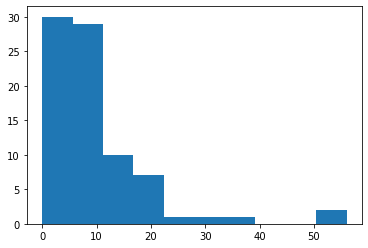

In [68]:
plt.hist([len(v) for v in overlapping_terms.values()])

(array([17.,  7.,  5.,  2.,  1.,  0.,  0.,  0.,  0.,  1.]),
 array([ 1. ,  6.5, 12. , 17.5, 23. , 28.5, 34. , 39.5, 45. , 50.5, 56. ]),
 <BarContainer object of 10 artists>)

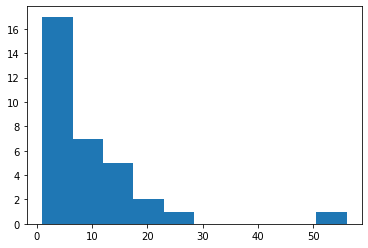

In [67]:
plt.hist([len(v) for v in overlapping_terms_filter.values()])

In [71]:
print(len(overlapping_terms.keys()))

81


In [70]:
print(len(overlapping_terms_filter.keys()))

33


In [77]:
de_genes

,logFC,AveExpr,t,P.Value,adj.P.Val,B
AQP3,-6.300183,3.298555,-37.147549,6.206266e-114,5.469582e-110,247.927181
MAF,-5.521903,3.369200,-33.797761,4.946358e-104,2.179613e-100,225.645859
PDPN,-5.852255,3.395294,-29.124095,3.185392e-89,9.357620e-86,192.183156
LGALS1,-1.840688,10.117213,-22.776495,3.051426e-67,6.723055e-64,142.281577
TMEM176B,-6.677593,3.523027,-22.178156,4.545083e-65,8.011164e-62,137.337013
...,...,...,...,...,...,...
MTHFR,0.405404,0.687422,2.554832,1.112014e-02,4.964630e-02,-4.028101
WDR76,-0.433569,3.409969,-2.554548,1.112904e-02,4.965368e-02,-4.028812
ZNF512B,0.530032,2.145423,2.554419,1.113306e-02,4.965368e-02,-4.029133
TPP1,-0.636203,2.505325,-2.552760,1.118507e-02,4.986039e-02,-4.033272


In [94]:
def get_hypergeometric_results_compass_data(de_genes, metabolism, M = n_genes_total, p_thresh = p_thresh, logfc_thresh = logfc_thresh):
    res = {k: {} for k in ['pvn', 'nvp']}
    for key in ['pvn', 'nvp']:
        df = de_genes.copy()
        df = df[df['adj.P.Val'] < p_thresh]
        if key == 'pvn':
            df = df[df['logFC'] > logfc_thresh]
        else:
            df = df[df['logFC'] < (-1 * logfc_thresh)]
            
        df['genes'] = df.index.str.upper()
        df_genes = set(df['genes'])
        N = len(df) # length of DE genes
        for k,v in metabolism.items():
            n = len(v) # number of met genes
            x = len(df_genes.intersection(v))
            pct_overlap = x/(N+n)

            if pct_overlap > 0:
                p_val = hypergeometric_test(total_genes_expressed=M, n_genes_of_interest=n, 
                                            n_genes_picked=N, n_overlap=x)
                res[key][k] = p_val
#             else:
#                 res[key][k] = 1
    return res

In [95]:
def format_hypergeom_res(res):
    res_df = pd.DataFrame.from_dict(res)
    res_df['term'] = res_df.index
    res_df['padj_pvn'] = adjust_p_value_bh(res_df['pvn'].values)
    res_df['padj_nvp'] = adjust_p_value_bh(res_df['nvp'].values)
    res_df['q_pvn'] = adjust_p_value_qval(res_df['pvn'].values,pi_0=None)
    res_df['q_nvp'] = adjust_p_value_qval(res_df['nvp'].values,pi_0=None)
    
    cols_pvn = ['pvn', 'term', 'padj_pvn', 'q_pvn']
    res_df_format = res_df[cols_pvn].reset_index(drop = True).copy()
    res_df_format.columns = ['p', 'term', 'padj', 'q']
    res_df_format = res_df_format[['term', 'p', 'padj', 'q']]
    res_pvn = res_df_format.copy()
    
    cols_nvp = ['nvp', 'term', 'padj_nvp', 'q_nvp']
    res_df_format = res_df[cols_nvp].reset_index(drop = True).copy()
    res_df_format.columns = ['p', 'term', 'padj', 'q']
    res_df_format = res_df_format[['term', 'p', 'padj', 'q']]
    res_nvp = res_df_format.copy()
    
    return res_pvn, res_nvp

In [96]:
res_pvn_all, res_nvp_all = format_hypergeom_res(get_hypergeometric_results_compass_data(de_genes, overlapping_terms_filter))

In [99]:
res_nvp_all.to_csv(out_dir + 'results_Th17n_v_p_compass_rxns_q.csv')
res_pvn_all.to_csv(out_dir + 'results_Th17p_v_n_compass_rxns_q.csv')

# reaction scoring

In [100]:
all_genes = list(compass_data.index)
overlapping_terms_rxn, n_removed_terms_rxn = get_overlapping_met_genes(reaction_sig, all_genes, verb = True)

13DAMPPOX	original: 3 | overlapping: 1 | removed: 2
2HBO	original: 5 | overlapping: 3 | removed: 2
2OXOADOXm	original: 4 | overlapping: 4 | removed: 0
34DHOXPEGOX	original: 6 | overlapping: 3 | removed: 3
34DHPHAMT	original: 1 | overlapping: 1 | removed: 0
34DHPLACOX	original: 4 | overlapping: 0 | removed: 4
34DHPLACOX_NADP_	original: 3 | overlapping: 0 | removed: 3
34DHXMANDACOX	original: 3 | overlapping: 0 | removed: 3
34DHXMANDACOX_NADP_	original: 2 | overlapping: 0 | removed: 2
34HPPOR	original: 1 | overlapping: 0 | removed: 1
3AIBTm	original: 1 | overlapping: 0 | removed: 1
3DSPHR	original: 1 | overlapping: 1 | removed: 0
3HAO	original: 1 | overlapping: 1 | removed: 0
3HBCDm	original: 1 | overlapping: 1 | removed: 0
3HKYNAKGAT	original: 2 | overlapping: 0 | removed: 2
3HLYTCL	original: 1 | overlapping: 0 | removed: 1
3HPCOAHYD	original: 1 | overlapping: 1 | removed: 0
3HXKYNOXDA	original: 2 | overlapping: 1 | removed: 1
3M4HDXPAC	original: 4 | overlapping: 0 | removed: 4
3MOX4HOXP

(array([351.,   6.,  20.,  66.,   5., 130.,  20.,  43.,  15., 636.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

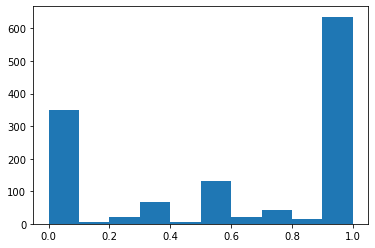

In [102]:
prop_removed_rxn = {}
for k,v in n_removed_terms_rxn.items():
    prop_removed_rxn[k] = (len(reaction_sig[k]) - v)/len(reaction_sig[k])
plt.hist(prop_removed_rxn.values())

(array([635.,   0., 413.,   0.,   0., 166.,   0.,   0.,  32.,   0.,   0.,
         10.,   0.,   0.,  22.,   0.,   0.,   6.,   0.,   0.,   1.,   0.,
          2.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,
          0.,   0.,   0.,   0.,   2.,   0.,   1.]),
 array([ 0.  ,  0.35,  0.7 ,  1.05,  1.4 ,  1.75,  2.1 ,  2.45,  2.8 ,
         3.15,  3.5 ,  3.85,  4.2 ,  4.55,  4.9 ,  5.25,  5.6 ,  5.95,
         6.3 ,  6.65,  7.  ,  7.35,  7.7 ,  8.05,  8.4 ,  8.75,  9.1 ,
         9.45,  9.8 , 10.15, 10.5 , 10.85, 11.2 , 11.55, 11.9 , 12.25,
        12.6 , 12.95, 13.3 , 13.65, 14.  ]),
 <BarContainer object of 40 artists>)

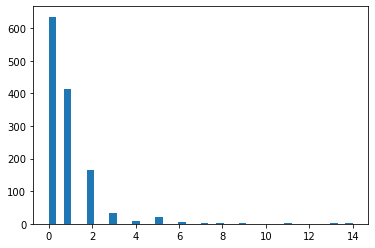

In [104]:
plt.hist(n_removed_terms_rxn.values(), bins = 40)
#plt.xlim(0,100)

In [ ]:
# min_prop = 0.7
# min_length = 1

In [105]:
overlapping_terms_filter_rxn = {}
for k,v in overlapping_terms_rxn.items():
    if (len(v) >= min_length) & (prop_removed_rxn[k] > min_prop):
        overlapping_terms_filter_rxn[k] = v

(array([1.196e+03, 9.100e+01, 2.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([ 0. ,  3.7,  7.4, 11.1, 14.8, 18.5, 22.2, 25.9, 29.6, 33.3, 37. ]),
 <BarContainer object of 10 artists>)

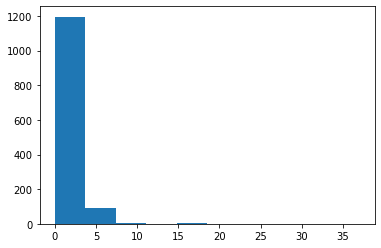

In [106]:
plt.hist([len(v) for v in overlapping_terms_rxn.values()])

(array([676.,  13.,   2.,   0.,   2.,   0.,   0.,   0.,   0.,   1.]),
 array([ 1. ,  4.6,  8.2, 11.8, 15.4, 19. , 22.6, 26.2, 29.8, 33.4, 37. ]),
 <BarContainer object of 10 artists>)

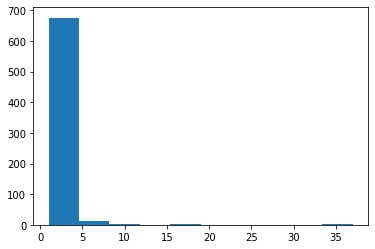

In [107]:
plt.hist([len(v) for v in overlapping_terms_filter_rxn.values()])

In [108]:
print(len(overlapping_terms_rxn.keys()))

1292


In [109]:
print(len(overlapping_terms_filter_rxn.keys()))

694


In [110]:
res_pvn_all_rxn, res_nvp_all_rxn = format_hypergeom_res(get_hypergeometric_results_compass_data(de_genes, overlapping_terms_filter_rxn))

In [115]:
res_nvp_all.to_csv(out_dir + 'results_Th17n_v_p_compass_rxns_q.csv')
res_pvn_all.to_csv(out_dir + 'results_Th17p_v_n_compass_rxns_q.csv')

### compare the data from different sources

1. github main repo

In [7]:
data_main = pd.read_csv(data_dir + 'github_main_expression.tsv', sep = '\t')
data_main.index = data_main['Gene Sybmol']
data_main = data_main.iloc[:,1:]
data_main

,WT-d_S141_L007_R1_001,Ob-DHA-e_S154_L007_R1_001,WT-1012-c_S135_L007_R1_001,Ob-DHA-b_S132_L007_R1_001,Ob-EPA-a_S122_L007_R1_001,Ob-c_S136_L007_R1_001,Ob-1012-c_S140_L007_R1_001,WT-EPA-e_S151_L007_R1_001,WT-DHA-d_S143_L007_R1_001,WT-DHA-b_S128_L007_R1_001,...,Ob-1012-a_S125_L007_R1_001,Ob-DHA-a_S123_L007_R1_001,WT-e_S150_L007_R1_001,Ob-911-e_S155_L007_R1_001,WT-a_S116_L007_R1_001,Ob-911-d_S148_L007_R1_001,WT-1012-e_S152_L007_R1_001,WT-911-d_S144_L007_R1_001,Ob-DHA-d_S147_L007_R1_001,WT-b_S126_L007_R1_001
Gene Sybmol,,,,,,,,,,,,,,,,,,,,,
0610005C13Rik,123.68,121.70,119.02,141.19,124.24,158.64,99.35,132.06,130.61,145.98,...,189.83,123.91,121.11,188.54,138.73,110.01,135.95,135.94,128.85,119.53
0610006L08Rik,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
0610007N19Rik,0.95,1.37,2.19,0.86,2.23,1.81,1.08,1.05,0.93,1.21,...,2.91,1.40,1.10,1.57,0.68,2.47,2.05,0.35,1.54,1.18
0610007P14Rik,43.24,46.56,50.75,50.79,59.34,39.13,45.79,60.09,42.50,43.38,...,43.04,52.85,53.12,51.25,50.48,58.33,47.61,43.35,55.82,58.14
0610009B22Rik,22.17,28.00,18.27,20.64,19.53,30.55,25.72,23.19,22.61,21.77,...,23.61,23.13,25.57,25.67,29.12,17.95,18.51,18.87,27.48,20.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
n-Ty6,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
n-Ty7,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
n-Ty8,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


2. github analysis repo

In [14]:
github_analysis = pd.read_csv(data_dir + 'github_data/linear_gene_expression_matrix.tsv', sep = '\t')
github_analysis.index = github_analysis['symbol']
github_analysis = github_analysis.iloc[:,1:]
github_analysis

,SRR2921282,SRR2921283,SRR2921284,SRR2921285,SRR2921286,SRR2921287,SRR2921288,SRR2921289,SRR2921290,SRR2921291,...,SRR2921703,SRR2921704,SRR2921705,SRR2921706,SRR2921707,SRR2921708,SRR2921709,SRR2921710,SRR2921711,SRR2921712
symbol,,,,,,,,,,,,,,,,,,,,,
EIF4G3,4.202413,8.213497,4.676238,8.335730,14.914479,2.218610,16.458903,12.597561,7.669135,1.372759,...,11.630111,1.061471,45.966113,7.326690,0.000000,63.653552,18.824913,4.692626,50.012383,2.503190
HP1BP3,20.879206,8.599123,17.840761,7.094533,12.182469,29.230658,5.467113,19.691104,19.496050,31.359563,...,57.424742,3.658751,20.493097,5.972731,0.000000,7.779188,6.712236,2.797540,24.588882,61.966887
DDOST,25.655510,20.598746,32.284522,82.526757,51.569797,153.009579,49.225370,11.878362,8.742755,34.808730,...,33.153836,26.099879,65.711937,14.730903,39.547804,41.653284,52.311439,28.572607,27.468897,20.325481
PINK1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.411237,...,0.000000,0.000000,0.000000,0.000000,3.927381,26.141552,0.000000,0.000000,0.000000,0.000000
MUL1,5.585995,2.166604,11.534226,3.960356,0.000000,0.000000,0.000000,40.854912,6.012559,20.732405,...,12.434381,5.250535,0.000000,16.210612,0.000000,0.000000,1.982427,1.604774,80.456677,12.371282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
HNRNPR,4.561581,21.979348,19.718558,19.741532,9.731525,14.633289,20.694800,19.061831,4.925602,16.586117,...,29.329860,3.533125,12.450690,45.203840,8.185080,39.258815,26.851364,12.598926,45.754426,0.973390
KDM1A,12.591848,1.920278,27.662254,10.055418,67.435913,17.539543,32.220364,0.000000,27.894950,21.662813,...,150.416676,71.645686,67.683956,25.921466,19.042276,13.032104,103.819747,129.199999,69.393255,14.024448
CDC42,553.127491,563.028662,515.584239,483.035417,399.715806,501.612973,539.621440,468.810148,774.173428,620.572998,...,821.815389,1190.901010,479.573364,919.711492,624.896571,755.785961,765.726947,1221.962581,636.307925,636.865030


In [15]:
metadata = pd.read_csv(data_dir + 'github_data/cell_metadata.csv')
metadata

,cell_id,cell_type,MD_SRX,NREADS,NALIGNED,RALIGN
0,SRR2921282,Th17p,SRX1435506,637389,396663,62.2325
1,SRR2921283,Th17p,SRX1435507,1074300,732092,68.1459
2,SRR2921284,Th17p,SRX1435508,1480810,1085800,73.3252
3,SRR2921285,Th17p,SRX1435509,1374340,982010,71.4531
4,SRR2921286,Th17p,SRX1435510,1243850,921003,74.0444
...,...,...,...,...,...,...
285,SRR2921708,Th17n,SRX1435924,2500130,1701980,68.0755
286,SRR2921709,Th17n,SRX1435925,3024280,2098810,69.3988
287,SRR2921710,Th17n,SRX1435926,2853240,1622680,56.8715
288,SRR2921711,Th17n,SRX1435927,2508770,1518530,60.5291


3. GEO

In [40]:
geo_111 = pd.read_csv(data_dir + 'geo_data/GSE75111/GSE75111_series_matrix.txt')
geo_111